# Depth-first search in a labyrinth

This section demonstrates the BACKTRACK1 procedure in a labyrinth. The labyrinth is
represented as a two-dimensional array. Wall tiles are marked with 1 and free ones with 0.

See also :
* https://en.wikipedia.org/wiki/Depth-first_search,
* https://en.wikipedia.org/wiki/Maze_solving_algorithm

The agent can move in four directions $π_1, π_2, π_3, π_4$. It tries to find a path to an exit, the program marks the deadends by putting -1 in the corresponding tiles. Metaphorically it corresponds to Ariadne’s thread, see the Greek myth : https://en.wikipedia.org/wiki/Ariadne.

# CSV Maze Reader

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import csv

# Read from a csv file and return an array
def mazeReader(fileName):
    mazeList = []
    with open(fileName) as mazeFile:
        mazeReader = csv.reader(mazeFile, delimiter=',')
        for row in mazeReader:
            mazeList.append(row)
    return mazeList

# Return the size of the Maze
def getMazeSize(mazeList):
    M = len(mazeList) - 1      # M => Number of Lines
    N = len(mazeList[0])       # N => Number of Columns
    return M, N

# Read and return the agent starting position
def getAgentInitialPosition(mazeList):
    M, N = getMazeSize(mazeList)
    X = int(mazeList[M][0]) 
    Y = int(mazeList[M][1]) 
    mazeList[Y][X] = 2
    return X, Y


# Maze printing

In [7]:
def printMaze(mazeList):
    plt.clf()
    # plt.axis("off")
    M, N = getMazeSize(mazeList)
    X, Y = getAgentInitialPosition(mazeList)

    fig = plt.figure(figsize=(N * 0.6, M * 0.6))

    # Mark the agent starting position
    plt.plot(X + 0.5, M - Y - 0.5, 'kx', markersize=(12))

    # Drawing the maze column by column
    for i in range(N):        # i => n° of the column
        for j in range(M):    # j => n° of the line

            ### Data Format ###
            # 1 = Wall
            # 0 = Not visited yet

            #### Printing of the walls ####
            # if the current tile is a wall
            if (mazeList[j][i] == '1'):
                # Then draw a square
                plt.plot([i + 1, i + 1, i, i, i + 1],
                         [M - j, M - j - 1, M - j - 1, M - j, M - j],
                         color="k")

            else:
                # if the current tile isn't an exit (= on the border)
                if (i != 0 and j != 0 and i != N-1 and j != M-1):
                    # Print the Agent's path
                    # if the current tile isn't an empty tile
                    # or the agent's starting position
                    if (mazeList[j][i] == -1):
                        plt.text(i + 0.5, M - j - 0.55, mazeList[j][i],
                                 horizontalalignment="center",
                                 verticalalignment="center",
                                 color="r",
                                 fontsize=(12))
                    else :
                        if(mazeList[j][i] != '0' and mazeList[j][i] != 2 and mazeList[j][i]):
                            plt.text(i + 0.5, M - j - 0.55, mazeList[j][i],
                                    horizontalalignment="center",
                                    verticalalignment="center",
                                    color="g",
                                    fontsize=(12))

                # if it is an exit.
                else:
                    if (mazeList[j][i] != '0'):
                        exitColor = "g"
                    else:
                        exitColor = "k"
                    if (i == 0):
                        exitMarker = '<'
                    elif (i == N - 1):
                        exitMarker = '>'
                    elif (j == 0):
                        exitMarker = '^'
                    elif (j == M - 1):
                        exitMarker = 'v'
                    plt.plot(i + 0.5, M - j - 0.5, exitMarker,
                             markersize=(10), color=exitColor)

    plt.xticks(np.arange(0, N+2, 1))
    plt.yticks(np.arange(0, M+2, 1))

    plt.axis('scaled')
    # plt.xlabel("X")
    # plt.ylabel("Y")

# Maze Solver - Depth-First Search

In [8]:
# Global variables:

# Production set
CXY = [[-1, 0, 1, 0],
        [0, -1, 0, 1]]

# Number of moves
K = len(CXY[0])

In [9]:
def mazeSolver(mazeList, M, N, L, X, Y):
    global CXY, K, trials

    if (X == 0 or Y == 0 or Y == M - 1 or X == N - 1):
        return True
    
    for k in range(K):
        U = X + CXY[0][k]
        V = Y + CXY[1][k]
        trials += 1
        if (mazeList[V][U] == '0'):
            
            L += 1
            mazeList[V][U] = L            
            print("Going [%d, %d], the tile is %d" % (U, V, L))
            if (mazeSolver(mazeList, M, N, L, U, V)) :
                return True
            else:  
                print("Dead end, Backtrack!")
                mazeList[V][U] = '-1'
                
                L -= 1
    return False

# Simple Mazes


Going [9, 8], the tile is 3
Going [8, 8], the tile is 4
Going [7, 8], the tile is 5
Going [6, 8], the tile is 6
Going [5, 8], the tile is 7
Going [4, 8], the tile is 8
Going [3, 8], the tile is 9
Going [2, 8], the tile is 10
Going [1, 8], the tile is 11
Going [1, 9], the tile is 12
Going [1, 10], the tile is 13
Going [2, 10], the tile is 14
Going [3, 10], the tile is 15
Going [3, 9], the tile is 16
Dead end, Backtrack!
Going [4, 10], the tile is 16
Going [5, 10], the tile is 17
Going [5, 9], the tile is 18
Dead end, Backtrack!
Going [6, 10], the tile is 18
Going [7, 10], the tile is 19
Going [7, 9], the tile is 20
Dead end, Backtrack!
Going [8, 10], the tile is 20
Going [9, 10], the tile is 21
Going [9, 9], the tile is 22
Dead end, Backtrack!
Going [9, 11], the tile is 22
Going [9, 12], the tile is 23
Going [8, 12], the tile is 24
Going [7, 12], the tile is 25
Going [6, 12], the tile is 26
Going [5, 12], the tile is 27
Going [4, 12], the tile is 28
Going [3, 12], the tile is 29
Going [

<Figure size 432x288 with 0 Axes>

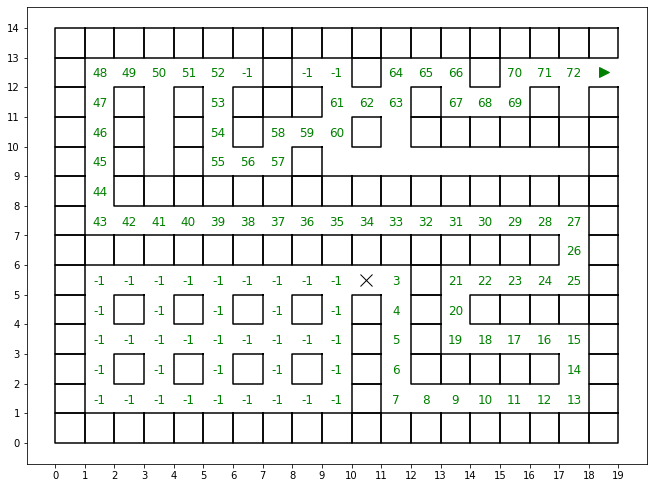

In [10]:
fileName = "Mazes/MazeC.csv"
mazeList = mazeReader(fileName)

trials = 0
X, Y = getAgentInitialPosition(mazeList)
M, N = getMazeSize(mazeList)

mazeSolver(mazeList, M, N, 2, X, Y)
print(trials)
printMaze(mazeList)